##다중행사가격 옵션(Multi-strike Option)
다중행사가격 옵션(Multi-strike Option)은 옵션의 페이오프가 여러 행사가격에 의해 결정되는 구조를 가진 옵션입니다. 이는 하나의 옵션 계약에 여러 개의 행사가격을 포함하여, 다양한 가격 수준에서 페이오프를 받을 수 있는 옵션입니다.

[*********************100%%**********************]  10 of 10 completed


Multi-strike Call Option Price: 39.41
Selected Tickers: ['PYPL', 'CSCO', 'CMCSA', 'MRK', 'TSLA', 'V', 'AMZN', 'PFE', 'DIS', 'NVDA']
Strikes: [66.00679969787598, 74.25764966011047, 82.50849962234497, 90.75934958457948, 99.01019954681396]


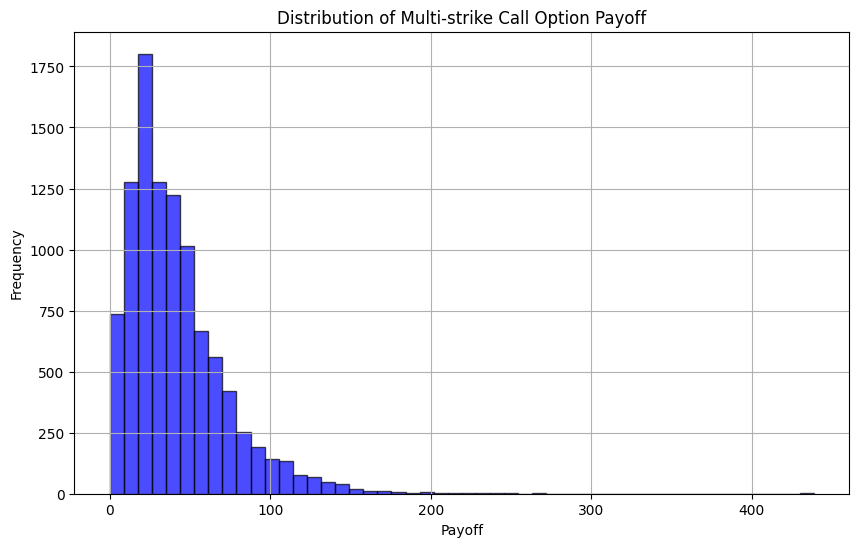

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격 (배열)
    r: 무위험 이자율
    sigma: 변동성 (배열)
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M x len(S0))
    """
    dt = T / M
    paths = np.zeros((I, M + 1, len(S0)))
    paths[:, 0, :] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal((I, len(S0)))
        for i in range(len(S0)):
            paths[:, t, i] = paths[:, t - 1, i] * np.exp((r - 0.5 * sigma[i] ** 2) * dt + sigma[i] * np.sqrt(dt) * z[:, i])
    return paths

def multi_strike_option_payoff(paths, strikes, weights, option_type="call"):
    """
    다중행사가격 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M x len(S0))
    strikes: 행사가격 배열
    weights: 각 행사가격에 대한 가중치
    option_type: "call" 또는 "put"

    Returns:
    다중행사가격 옵션의 페이오프 배열
    """
    final_prices = np.sum(paths[:, -1, :] * weights, axis=1)
    payoffs = np.zeros_like(final_prices)

    for strike in strikes:
        if option_type == "call":
            payoffs += np.maximum(final_prices - strike, 0)
        elif option_type == "put":
            payoffs += np.maximum(strike - final_prices, 0)
        else:
            raise ValueError("option_type must be 'call' or 'put'")

    return payoffs

# 주식 티커 목록에서 무작위로 10개 선택
all_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA', 'FB', 'BRK-B', 'JNJ', 'JPM', 'V', 'PG', 'NVDA', 'DIS', 'NFLX', 'PFE', 'ADBE', 'PYPL', 'CMCSA', 'INTC', 'T', 'VZ', 'KO', 'PEP', 'CSCO', 'MRK', 'ABT', 'MCD', 'NKE', 'ORCL', 'CRM']
random_tickers = random.sample(all_tickers, 10)

# yfinance를 사용하여 데이터 다운로드
data = yf.download(random_tickers, start="2023-01-01", end="2023-12-31")['Close']
closing_prices = data.values

# 10개의 주식의 초기 가격, 변동성 계산
S0 = closing_prices[0]
sigma = np.std(np.diff(np.log(closing_prices), axis=0), axis=0) * np.sqrt(252)

# 다중행사가격 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
strikes = [np.mean(S0) * (1 + 0.1 * i) for i in range(-2, 3)]  # 여러 행사가격 설정
weights = np.ones(len(S0)) / len(S0)  # 균등 가중치

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 다중행사가격 옵션 페이오프 계산
multi_strike_call_payoffs = multi_strike_option_payoff(paths, strikes, weights, option_type="call")

# 다중행사가격 옵션 가격 계산 (할인된 페이오프 평균)
multi_strike_call_price = np.exp(-r * T) * np.mean(multi_strike_call_payoffs)
print(f"Multi-strike Call Option Price: {multi_strike_call_price:.2f}")

# 선택된 주식 티커 출력
print("Selected Tickers:", random_tickers)
print("Strikes:", strikes)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(multi_strike_call_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Multi-strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
